In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import fitutils as ft
import scipy.optimize as opt
import near0_nonlinear_analysis

# Data

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature


squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature
err_squared_temperature = 2*temperature*err_temperature

In [3]:
# Constants 

k = 1.380649e-23
r = 8.31446261815324  # J/mol.K

In [4]:
# Data near 0 (between 0 K and 10 K)

squared_temperature_near0, C_div_T_near0 = tools.tab_interval(squared_temperature, C_div_T, 0, 100)

In [5]:
# Theoritical function

def fit_func(x, beta, gamma, n, E):
    """Fit function for the nonlinear analysis of C/T - C_schottky vs T².
    Parameters: x = T² (K²), beta = mJ/K⁴.mol, gamma = mJ/K².mol, n = dimensionless"""
    phonon = beta * x
    y = E/(k*np.sqrt(x))
    schottky = (y**2) * np.exp(y)/((np.exp(y) + 1)**2)
    return phonon + gamma + n*r*1e3*schottky/np.sqrt(x)

In [6]:
# Optimized parameters

beta, gamma, n, E = near0_nonlinear_analysis.nonlinear_fit(0, 10)

print("Beta, Gamma, n, E : ", beta, gamma, n, E)

Beta, Gamma, n, E :  0.4687092385413029 2.801383828811404 0.009999999974408704 1.0966256176654794e-22


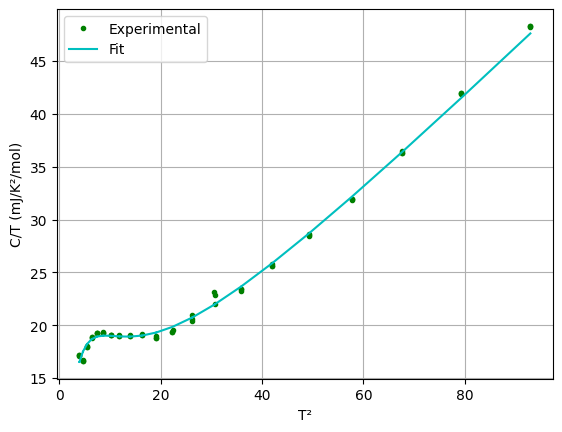

In [7]:

# Plot theoritical function and data

plt.figure()
plt.plot(squared_temperature_near0, C_div_T_near0, ".g", label="Experimental")
plt.plot(squared_temperature_near0, fit_func(squared_temperature_near0, beta, gamma, n, E), "-c", label="Fit")
plt.grid(True)
plt.xlabel("T²")
plt.ylabel("C/T (mJ/K²/mol)")
plt.legend()

In [10]:
# Debye temperature

debye_temperature = near0_nonlinear_analysis.debye_temperature(0, 10)

print("Debye temperature : ", debye_temperature, "K")

Debye temperature :  377.3071495558896 K
